In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
survey_path = "output data/HHS_COVID-19_Monthly_Outcome_Survey_-_Wave_11-2.csv"
# Read the mouse data and the study results
covid19_metadata = pd.read_csv(survey_path)
covid19_metadata

,public_id,CAM5_VaccUptake,CAM5a_VaccLike,CAM6_VaccWait,CAM7_VaccBel_1,CAM7_VaccBel_2,CAM7_VaccBel_3,CAM7_VaccBel_5,CAM7_VaccBel_6,Child_Age_04,...,parent,xurbanicity,agecat,ppeducat,ppgender,income,ppreg4,race,politicalideo,Weights
0,10016839,2,-100,-100,5,1,1,1,1,0,...,0,3,3,3,1,4,2,2,3,0.960202
1,10016983,0,1,60,1,5,3,5,5,0,...,0,1,3,3,1,4,4,3,1,1.984764
2,10051722,2,-100,-100,4,3,2,4,3,0,...,0,3,2,1,1,2,2,2,3,2.118742
3,10071608,2,-100,-100,2,5,4,5,2,0,...,0,3,4,2,2,6,1,2,3,1.016854
4,10094375,2,-100,-100,5,1,1,1,1,0,...,0,3,5,3,2,3,3,2,2,0.651796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5024,99831664,2,-100,-100,5,1,1,1,1,0,...,0,3,5,4,1,7,2,2,4,0.501408
5025,99904583,2,-100,-100,4,2,2,3,2,0,...,0,3,4,2,1,5,3,2,3,0.863215
5026,99944355,2,-100,-100,3,2,3,4,4,-99,...,-99,1,3,4,2,6,4,5,3,0.863765
5027,99960227,2,-100,-100,5,1,1,2,2,0,...,0,1,4,4,2,4,3,1,3,0.681932


In [4]:
# to look dataset have any null values and Columns data types.
covid19_metadata.dtypes

public_id            int64
CAM5_VaccUptake      int64
CAM5a_VaccLike       int64
CAM6_VaccWait        int64
CAM7_VaccBel_1       int64
                    ...   
income               int64
ppreg4               int64
race                 int64
politicalideo        int64
Weights            float64
Length: 81, dtype: object

In [5]:
# to look dataset have any null values
# False --> means there are not null values.
# True --> means there are null values. 
covid19_metadata.isnull().sum().any()

False

In [6]:
duplicate_id = covid19_metadata[covid19_metadata.duplicated(subset=['public_id'])]
duplicate_id 

,public_id,CAM5_VaccUptake,CAM5a_VaccLike,CAM6_VaccWait,CAM7_VaccBel_1,CAM7_VaccBel_2,CAM7_VaccBel_3,CAM7_VaccBel_5,CAM7_VaccBel_6,Child_Age_04,...,parent,xurbanicity,agecat,ppeducat,ppgender,income,ppreg4,race,politicalideo,Weights


In [7]:
# Name of the columns of the dataframe.
covid19_metadata.columns

Index(['public_id', 'CAM5_VaccUptake', 'CAM5a_VaccLike', 'CAM6_VaccWait',
       'CAM7_VaccBel_1', 'CAM7_VaccBel_2', 'CAM7_VaccBel_3', 'CAM7_VaccBel_5',
       'CAM7_VaccBel_6', 'Child_Age_04', 'Child_Age_511', 'Child_Age_1217',
       'CAM11_Par1_Grid_511', 'CAM11_Par1_Grid_1217', 'CAM11_Par2_Grid_511',
       'CAM11_Par2_Grid_1217', 'CAM11_Par3_Grid_6mo4', 'CV1', 'CV2_1_Fever',
       'CV2_2_Cough', 'CV2_3_Breath', 'CV2_4_Senses', 'CV2_5_Flu',
       'CV3_1_Fever', 'CV3_2_Cough', 'CV3_3_Breath', 'CV3_4_Senses',
       'CV3_5_Flu', 'CV4_1_Self', 'CV4_2_Family', 'CV4_3_No', 'CV5_1_Hospital',
       'CV5_2_Urgent_care', 'CV5_3_Doctor', 'CV5_4_Phone', 'CV5_5_Video',
       'CV5_6_Chat', 'CV5_7_None', 'CV6a_Rec', 'CV6b', 'CV6c_Rec', 'CV7a',
       'CV7b', 'CV8a', 'CV8b', 'CV8c', 'CV9_1_Unemployment_benefits',
       'CV9_2_COVID_enhanced', 'CV9_3_CARES', 'CV9_4_None',
       'CV10_1_Children_home', 'CV10_2_Home_schooled', 'CV10_3_Work_from_home',
       'CV10_4_Return_to_work', 'CV10_5_No

In [5]:
# Information about the dataframe:
covid19_metadata.info

<bound method DataFrame.info of       public_id  CAM5_VaccUptake  CAM5a_VaccLike  CAM6_VaccWait  \
0      10016839                2            -100           -100   
1      10016983                0               1             60   
2      10051722                2            -100           -100   
3      10071608                2            -100           -100   
4      10094375                2            -100           -100   
...         ...              ...             ...            ...   
5024   99831664                2            -100           -100   
5025   99904583                2            -100           -100   
5026   99944355                2            -100           -100   
5027   99960227                2            -100           -100   
5028   99983421                2            -100           -100   

      CAM7_VaccBel_1  CAM7_VaccBel_2  CAM7_VaccBel_3  CAM7_VaccBel_5  \
0                  5               1               1               1   
1                  

In [8]:
# Descriptive statistics of numeric columns.
statistics = covid19_metadata.describe()
statistics

,public_id,CAM5_VaccUptake,CAM5a_VaccLike,CAM6_VaccWait,CAM7_VaccBel_1,CAM7_VaccBel_2,CAM7_VaccBel_3,CAM7_VaccBel_5,CAM7_VaccBel_6,Child_Age_04,...,parent,xurbanicity,agecat,ppeducat,ppgender,income,ppreg4,race,politicalideo,Weights
count,5.029000e+03,5029.000000,5029.000000,5029.000000,5029.000000,5029.000000,5029.000000,5029.000000,5029.000000,5029.000000,...,5029.000000,5029.000000,5029.000000,5029.000000,5029.000000,5029.000000,5029.000000,5029.000000,5029.000000,5029.000000
mean,5.461263e+07,1.465301,-81.180752,-75.492742,3.725989,1.661563,1.844701,2.389342,2.008550,-0.264665,...,-0.106383,2.175383,3.966196,3.106781,1.503878,4.564923,2.657785,2.595347,2.829588,0.999999
std,2.580553e+07,4.320337,39.537533,53.037091,3.519646,3.342310,3.971951,4.725430,4.241765,5.756542,...,5.775364,0.884017,0.854611,0.928174,0.500035,5.138303,1.021258,1.205227,1.032387,0.981177
min,1.001684e+07,-99.000000,-100.000000,-100.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,...,-99.000000,1.000000,2.000000,1.000000,1.000000,-99.000000,1.000000,1.000000,1.000000,0.157118
25%,3.257743e+07,2.000000,-100.000000,-100.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,3.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000,0.587129
50%,5.352488e+07,2.000000,-100.000000,-100.000000,4.000000,1.000000,1.000000,2.000000,2.000000,0.000000,...,0.000000,2.000000,4.000000,3.000000,2.000000,5.000000,3.000000,2.000000,3.000000,0.766545
75%,7.715902e+07,2.000000,-100.000000,-100.000000,5.000000,2.000000,3.000000,4.000000,3.000000,0.000000,...,0.000000,3.000000,5.000000,4.000000,2.000000,6.000000,3.000000,3.000000,4.000000,1.082368
max,9.998342e+07,2.000000,5.000000,60.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,...,1.000000,3.000000,5.000000,4.000000,2.000000,7.000000,4.000000,7.000000,4.000000,20.663841


In [9]:
covid19_metadata['CAM6_VaccWait'].unique()

array([-100,   60,    2,    1,  -99])

In [10]:
covid19_metadata['CAM6_VaccWait'].nunique()

5

In [11]:
highest_rated = covid19_metadata['CAM6_VaccWait'].sort_values(ascending=False)
highest_rated

2219     60
390      60
4362     60
4360     60
3228     60
       ... 
1854   -100
1855   -100
1856   -100
1857   -100
5028   -100
Name: CAM6_VaccWait, Length: 5029, dtype: int64

In [12]:
# Explore the distribution of responses in the CAM5_VaccUptake column
vaccine_uptake = covid19_metadata['CAM5_VaccUptake'].value_counts(normalize=True) * 100
vaccine_uptake

 2     81.308411
 0     16.882084
 1      1.630543
-99     0.178962
Name: CAM5_VaccUptake, dtype: float64

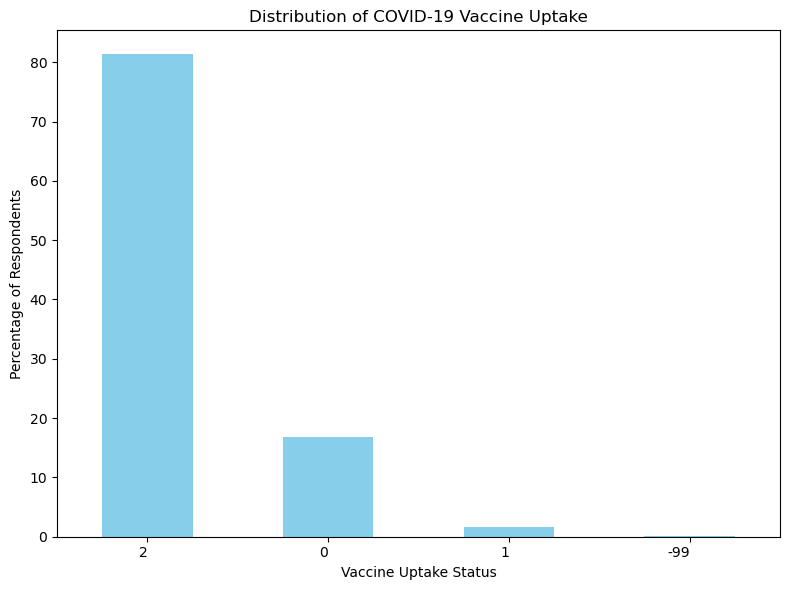

In [13]:
plt.figure(figsize=(8, 6))
vaccine_uptake.plot(kind='bar', color='skyblue')
plt.title('Distribution of COVID-19 Vaccine Uptake')
plt.xlabel('Vaccine Uptake Status')
plt.ylabel('Percentage of Respondents')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()


In [14]:
# Group by age category and calculate vaccine uptake percentages
vaccine_uptake_by_age = covid19_metadata.groupby('agecat')['CAM5_VaccUptake'].value_counts(normalize=True) * 100
vaccine_uptake_by_age

agecat  CAM5_VaccUptake
2        2                 72.413793
         0                 25.287356
         1                  2.298851
3        2                 72.895863
         0                 24.322397
         1                  2.710414
        -99                 0.071327
4        2                 80.726108
         0                 17.084891
         1                  1.922050
        -99                 0.266951
5        2                 90.443038
         0                  9.113924
         1                  0.253165
        -99                 0.189873
Name: CAM5_VaccUptake, dtype: float64

<Figure size 1000x600 with 0 Axes>

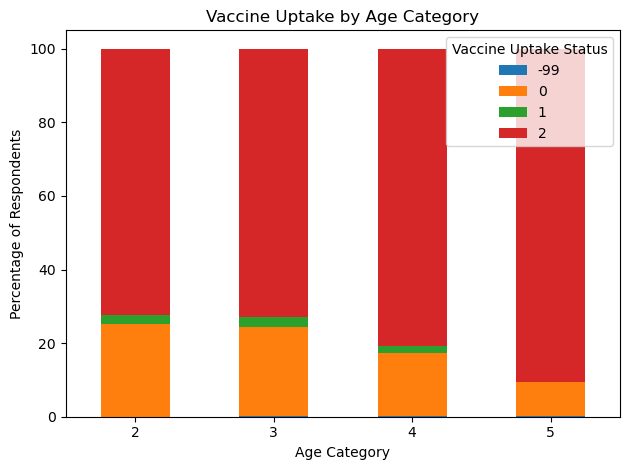

In [13]:
# Plot vaccine uptake percentages by age category
plt.figure(figsize=(10, 6))
vaccine_uptake_by_age.unstack().plot(kind='bar', stacked=True)
plt.title('Vaccine Uptake by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Percentage of Respondents')
plt.xticks(rotation=0)
plt.legend(title='Vaccine Uptake Status')
plt.tight_layout()
plt.show()

In [14]:
# Group by race category and calculate vaccine uptake percentages
vaccine_uptake_by_gender = covid19_metadata.groupby('ppgender')['CAM5_VaccUptake'].value_counts(normalize=True) * 100
vaccine_uptake_by_gender

ppgender  CAM5_VaccUptake
1          2                 81.923848
           0                 16.192385
           1                  1.763527
          -99                 0.120240
2          2                 80.702447
           0                 17.561168
           1                  1.499605
          -99                 0.236780
Name: CAM5_VaccUptake, dtype: float64